<a href="https://colab.research.google.com/github/peiyulan/From-Images-to-Text-Working-with-OCR/blob/main/ImageToTextOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Welcome: From Images to Text: Working with OCR**


## Overview

This course provides an overview of Optical Character Recognition (OCR), an image processing technique for extracting text from images.

The resource covers the following sections to help you learn and start to apply OCR in research practice:

- What is text extraction and OCR?
- What are the real-world application of OCR?
- What challenges might you face when using OCR and how can you address them?

We will learn the fundamental concepts and implement OCR techniques through the following activities:

- Activity 1: Write down your OCR Workflow
- Activity 2: Inspect the Files
- Activity 3: Online OCR Engine
- Activity 4: Clean Your Text with Regex
- Activity 5: OCR Tesseract Module with Python or R
- Activity 6: HTR Handwritten Text Recognition

> üëã New to Google Colab and Python? No worries! Let's get you started by running the code snippet below to make sure everything is working properly for you. It's a great way to take your first steps into coding!

In [ ]:
print("Enter your name and press enter:")
name = input()
print("\r")
print("Hello {}, welcome to the CDCS Image to Text with OCR workshop!".format(name))



---



# **What is OCR?**

## **O**ptical¬†**C**haracter¬†**R**ecognition
- OCR is a technique to process images of text, such as written or printed documents, and produce **machine-readable**¬†documents.
- Machine-readable documents are encoded in formats that computers can process, which allow the text to be searched, edited and analysed computationally

## Real-world examples of OCR

- Scanning your passport at the airport
- Generate machine-readable text for text-to-speech technology.
- Making digitalised physical archives searchable.‚Äã
- Creating a dataset of for text mining or
text analysis.‚Äã



## OCR Workflow

OCR is a multi-step process and we'll examine this as we move through the lesson.




1.   **Document selection**: An image or text document needs to be selected to scan.
2.   **Scanning**: The images are then scanned by OCR software. This generates a machine-readable text output.
3.   **Cleaning** :Once you have an OCR output, extra steps to clean the files might be need to improve accuracy.
4.   **Saving files**: the machine-readable documents can be saved and are to use.



## ‚úèÔ∏è *Activity 1: Write Down Your OCR Workflow*  


- Identify a dataset (images of text)
that you might use in your research‚Äã.

- Write the steps to obtained encoded
text from your dataset.‚Äã

- Identify potential source of errors or
issues in each step, and discuss how
you might address them.‚Äã

- Share your dataset, workflow, and
plan with your small group.‚Äã





# **Challange and Error of OCR**

Unfortunately, text recognition is not a perfect process, and you are likely to encounter problems or errors in the text outputs.

The accuracy of OCR can be limited by the **OCR engine capability**:
- file size
- format of the input files
- text orientation
- language it can process

It also depends on **dataset quality, formatting of the origianl documents:**
- Human errors and typos‚Äã
- Age and damage (stained or blurry)‚Äã
- Mixed text and images, or multiple
languages‚Äã
- Cursive handwriting‚Äã

# **Ways to improve OCR accuracy**

While the accuracy or OCR will never be 100%, there are ways to reduce errors and imrove OCR accuracy:

- Select good quality dataset to begin with‚Äã

- Pre-process your dataset to improve its quality‚Äã

- Correct errors in OCR-produced files

- Improve OCR engine capability‚Äã



---



# Dataset Selection

Selecting good quality data to start with means that you don‚Äôt need to edit and process your image too much from the beginning. Key considerations include:







**Image resolution**

Set a minimum DPI metric. DPI means ‚ÄòDots Per Inch‚Äô and means that every inch of an image contains a certain number of dots of ink. 300 DPI is often used as a benchmark for good quality printing reproducibility for photographs, but this may vary.  

**Types of error**

By checking the documents or sample documents, you can identify the patterns documents that might cause errors during scanning and reduece the work required for clearning the files afterwards.

Some "patterned" or "predictable" error can be fixed commutationally using software or programming patches:

*   **Characters that appear similar** can be misrecognised, for example ‚Äòcl‚Äô and ‚Äòd‚Äô, or ‚Äòrn‚Äô and ‚Äòm‚Äô, which results in the incorrect substitution of a letter or letters. E.g. ‚Äòclean‚Äô becomes recognised as ‚Äòdean‚Äô.
*   **Different letter forms**, such as in some older historical materials a different form of 's' is used. This is called a long s and looks like this '≈ø', which is often mis-recognised as an 'f' character.
E.g. ≈øleeve [sleeve] -> fleeve


Some error is unpredictable and therefore more difficult to be tackeled, such as:
- Age and damage of the files (stained or blurry)
- Human error such as typo‚Äãs and smelling variations
- Mixed formating, text and images
- Cursive handwriting‚Äã


## ‚úèÔ∏è *Activity 2: Inspect the Files*  

*   Identify issues you might encounter when processing the following documents.  ‚Äã
- Are there any steps you could take to
preprocessing the document that might
improve the output accuracy?‚Äã

‚Äã


![](https://github.com/DCS-training/Image-to-Tech-Text-Extraction/blob/main/Github%20Images/Image1.jpg?raw=true)


Document 1: image above from the Scottish Session Papers collection held by the University of Edinburgh, shelfmark [EUL0011](https://librarylabs.ed.ac.uk/iiif/uv/?manifest=https://librarylabs.ed.ac.uk/iiif/manifest/sessionpapers/volumes/EUL0011.json#?c=0&m=0&s=0&cv=21&xywh=-510%2C0%2C9022%2C5263) under a [CC BY 3.0](https://creativecommons.org/licenses/by/3.0/) licence.

![](https://github.com/DCS-training/Image-to-Tech-Text-Extraction/blob/main/Github%20Images/Image2.jpg?raw=true)

Document 2: image above from the Scottish Session Papers collection held by the University of Edinburgh, shelfmark [EUL0281](https://librarylabs.ed.ac.uk/iiif/uv/?manifest=https://librarylabs.ed.ac.uk/iiif/manifest/sessionpapers/volumes/EUL0281.json#?c=0&m=0&s=0&cv=0&xywh=-2584%2C-252%2C8636%2C5038) under a [CC BY 3.0](https://creativecommons.org/licenses/by/3.0/) licence.

# **Pre-processing**

Once you identify the dataset, preparing your files for scanning can help to produce better outputs after scanning. There are a few ways to do this:

**Image colour**

The colour of your images can impact text quality too; colour images can be used, but ensure there is a sharp contrast between the background page and the text itself (for example black text on white or cream paper).
**Text orientation:**
The orientation of your text is also important in text recognition as the letters that your OCR engine tries to match against will be the ‚Äòright‚Äô way up and straight on the page, so making sure that the text in the documents you upload is ‚Äòstraight on‚Äô in the document or image will produce the best results.

**File format:**

Some OCR engines will only accept certain file formats, so it is best to check this in advance; some will only use image files, whereas others will work on PDF files. Common image file types are TIFF, JPEG and PNG.

TIFF files are lossless files, meaning that no image quality or information is lost; this means that TIFF images are usually high quality but also much larger file sizes. PNGs are also lossless, although TIFF files would be preferred over PNGs for OCR.

JPEGs are a lossy format type, meaning that the image is compressed to create a smaller file size. OCR engines can work with JPEGs, but there may be a loss of image quality that can impact the text generation.

# Scanning

Now we're going to try some OCR ourselves with out-of-the-box options.

## ‚úèÔ∏è *Activity 3: Online OCR Engine*  
 Choose a pdf that contains text and try uploading it into some of these online programmes:
*   https://tools.pdf24.org/en/ocr-pdf   
*   https://www.onlineocr.net/   
*   https://www.sodapdf.com/ocr-pdf/   
*   https://www.sejda.com/ocr-pdf   
*   https://ocr.space/   
*   https://avepdf.com/pdf-ocr   











Compare your results - which performed best? What are the limitations of these options?




# **Cleaning**

**Manually remove errors**

Read through the text and manually change what needs to be changed ‚Äì this is one option to create a high-quality text with your corrections, however, it can be time and effort consuming


**Patches and Machine Learning techniques**:
Certain software have an embedded lexicon or dictionary that can be used to identify incorrect vocabulary and correct likely words based on the lexicon and calculated probability of correct words.

**Regex**

Regex (or regular expressions) is a type of shorthand code you can use to specify which parts of text you would like to target and how you would like to change these.

OCR has been developing at a significant rate over the past twenty years and newer OCR is faster and more accurate than older software, but it is still liable to errors.

## Regex (Regular Expressions)

Regular expressions or regex are a way to identify and match patterns via code and is used in a range of different programming environments.

Regex is a powerful way to find, manage and transform your data and files. It uses sequences of characters to define a search to match strings. You can use regex to:
*   Match types of characters (e.g. ‚Äòupper case letters‚Äô, ‚Äòdigits‚Äô, ‚Äòspaces‚Äô, etc.)  
*   Match patterns that repeat any number of times



There are far too many to remember off the top of your head, so online cheat sheets are your best option.

Check out the following webpages for different patterns:

*   [Cleaning OCR‚Äôd text with Regular Expressions](https://programminghistorian.org/en/lessons/cleaning-ocrd-text-with-regular-expressions)
- [Regex cheat sheet ](https://www.rexegg.com/regex-quickstart.php)

Here are some examples of what you can do with regex.

> Don't worry, you don't need to understand how this all works, but if you click the 'run' button at the left side of the code module it will run the code and show you the results.



## ‚úèÔ∏è *Activity 4: Clean Your Text with Regex*  

Example 1:
- search and replace where long 's' with modern 's' characters.

"Thi≈ø i≈ø my extracted text, but it doe≈øn't look right"

In [ ]:
#import Python regex module re
import re

#identify the text we wish to correct
test_text = "Thi≈ø i≈ø my extracted text, but it doe≈øn't look right"

#this is the pattern we want to find with the long 's' character
pattern = r"≈ø"

#here we substitute the pattern (wrong character) for the right character - 'print' displays the corrections we have made
print(re.sub(pattern, "s", test_text))

Example 2:

Now we want to clean up the OCR file of the the image. Let's first have a look at the result.

In [ ]:
import requests
# Define the file to be imported
filepath = "https://raw.githubusercontent.com/DCS-training/OCR-From-Images-To-Text-2025/refs/heads/main/Working%20with%20Python/data/ocrtext_1.txt"
# Request the file from database
req = requests.get(filepath)
text = req.text

# Print the text
print(text)

The OCR result is not too bad, but it still needs to be cleaned up with the following steps:

1. join up words that are split across lines with '-'
2. remove the '"' at the begining of the sentences

In [ ]:
# Replace '"' in the text with ''
pattern1 = r'"'
result = re.sub(pattern1, '', text)
print("Text after removing '\"':\n\n{} \n".format(result))

In [ ]:
# Replace '-' in the text with ''
pattern2 = r'-'
result2 = re.sub(pattern2, '', result)
print("Text after removing '-':\n\n{}\n".format(result2))

In [ ]:
# Replace newline '\n' in the text with ' '
pattern3 = r'\n'
result3 = re.sub(pattern3, ' ', result2)
print("Text after removing 'nextline':\n\n{}\n".format(result3))

In [ ]:
# Use "OR" character "|" and "AND" character "&" to combine different patterns
# Replace '"' or '-' or ''\n in the text with''
pattern = r'"|-|\n'
result = re.sub(pattern, '', text)
# Print the result
print("Text after removing '\"':\n\n{} \n".format(result))


You can also fix the formating by adding a blank space after the puctuation marks.

In [ ]:
# The following expression means "," or ";" followed by (not blank space (?! )
pattern4 = r'(,|;)(?! )'
result_fixedpunctuation = re.sub(pattern4, ', ', result)
# Print the result
print("Text after fixing punctuation:\n\n{} \n".format(result_fixedpunctuation))

# üü¢ **OCR with Tesseract (pytesseract)**

Tesseract is an OCR engine developed for various operating systems‚Äã to extract printed text from images. It is of the most accurate open-source OCR engines available‚Äã.


## ‚úèÔ∏è *Activity 5: pytesseract*  

The following example demonstrate image pre-processing and text extraction using opencv and pytesseract.


In [192]:
!pip install pytesseract
!pip install deskew


In [195]:
import zipfile
import pandas as pd
import os

# Open the zip file
!wget https://github.com/DCS-training/OCR-From-Images-To-Text-2025/raw/refs/heads/main/Working%20with%20Python/data.zip
!unzip /content/data.zipA

# These are the packages you will need to process the image and perform OCR scanning
import pytesseract # OCR engine tesseract
import cv2 # opencv
import numpy as np # supporting open cv

# To load language packages
import os
os.environ['TESSDATA_PREFIX'] = 'data/tessdata/'
#print(pytesseract.get_languages(config='')) show available language packages

# To plot and show image
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.patches as patches

--2025-10-10 13:47:51--  https://github.com/DCS-training/OCR-From-Images-To-Text-2025/raw/refs/heads/main/Working%20with%20Python/data.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DCS-training/OCR-From-Images-To-Text-2025/refs/heads/main/Working%20with%20Python/data.zip [following]
--2025-10-10 13:47:51--  https://raw.githubusercontent.com/DCS-training/OCR-From-Images-To-Text-2025/refs/heads/main/Working%20with%20Python/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20599617 (20M) [application/zip]
Saving to: ‚Äòdata.zip.1‚Äô

data.zip.1          100%[===================>]  19.6

## Basic text recognision with Tesseract

> Run the following code to set up the files:

/tmp/ipython-input-1043259677.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)


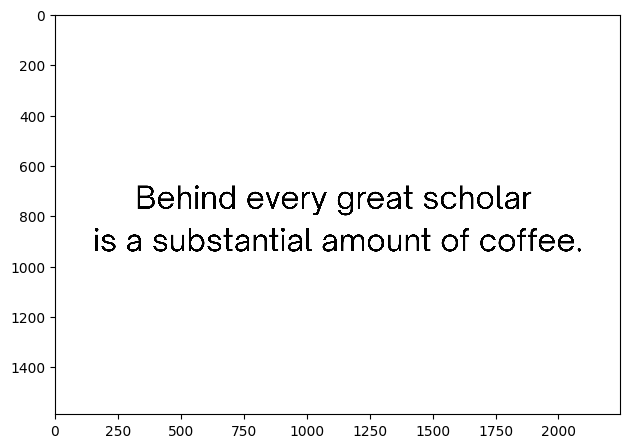

In [196]:
#load and show image
img = io.imread('data/img_english.jpg')
io.imshow(img)

In [198]:
# extract text from img using "image_to_string()", the extracted text is stored in ocr_text
#image_to_string() is a function in pytesseract,
#it take an image as input and recognised text as output.

ocr_text = pytesseract.image_to_string(img)
print(ocr_text)

Behind every great scholar
Is a substantial amount of coffee.



## Text recognision in different/multiple languages

Pytesseract uses English as its default language recognition package. However, more and more packages have been developed overthe years and you can find information and download the packages from the following website:

- Check language package information: [Here](https://tesseract-ocr.github.io/tessdoc/Data-Files-in-different-versions.html)
- Download language packages: [Here](https://github.com/tesseract-ocr)
- The most commonly used pre-trained language packages can be found in  tessdata_best folder


In [199]:
# once you've downloaded the packages, you can check if they are installed successfully.
# The following line shows all available tesseract language packages and codes
print(pytesseract.get_languages(config=''))

['chi_sim', 'chi_sim_vert', 'chi_tra', 'chi_tra_vert', 'eng', 'enm', 'jpn', 'jpn_vert', 'lat', 'osd']


/tmp/ipython-input-346694341.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)


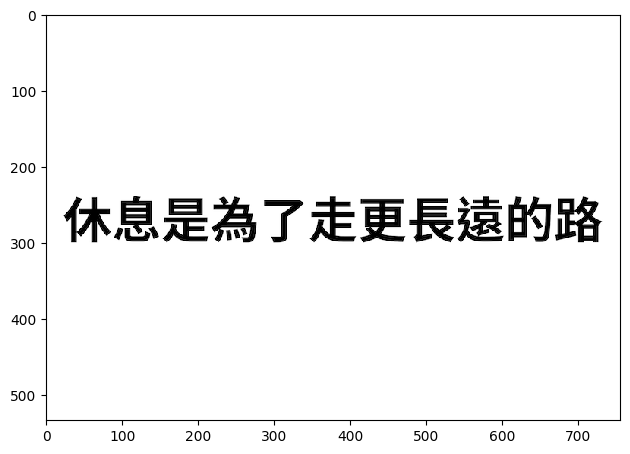

In [200]:
#load and show image with Traditional Chinese texts
img = io.imread('data/img_chi_tra.jpg')
io.imshow(img)

In [201]:
# extract text by specifying the language package uisng argument lang=''
# in our case, the language would be Traditional Chinese 'chi_tra'

ocr_text = pytesseract.image_to_string(img, lang='') #the extracted text is stored in ocr_text
print(ocr_text)

TesseractError: (1, "Tesseract couldn't load any languages! Could not initialize tesseract.")

You can also specify multiple languages

/tmp/ipython-input-1195563052.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)


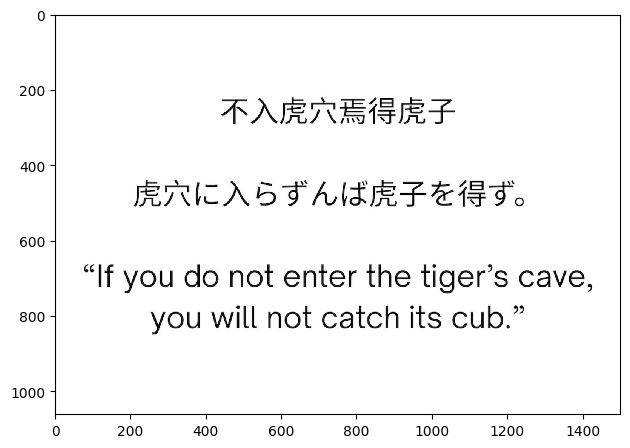

In [202]:
#load and show image with multiple languages
img = io.imread('data/img_multi.jpg')
io.imshow(img)

In [203]:
# specifying multiple languages
'''
uisng argument lang='' to specify the language
in the case of using multiple languages packages, use "+" in between the package codes
for example: 'jpn+eng' means Japanese and English
'''
ocr_text = pytesseract.image_to_string(img, lang='') #the extracted text is stored in ocr_text
print("\nHere is the result:\n")
print(ocr_text)

TesseractError: (1, "Tesseract couldn't load any languages! Could not initialize tesseract.")

Note that the the time taken for OCR as well as the output can be different based on the order of languages. If language is not specified, it would be English by default.

Now let's try changing the order of the languages in lang argument and compare the results:

In [204]:
chi_text = pytesseract.image_to_string(img, lang='chi_tra')
chijpn_text = pytesseract.image_to_string(img, lang='chi_tra+jpn')
chijpneng_text = pytesseract.image_to_string(img, lang='chi_tra+jpn+eng')
print("01 Chinese traditional:\n" + chi_text)
print("\n02 Chinese traditional + Japanese:\n" + chijpn_text)
print("\n03 Japanese + English:\n" + chijpneng_text)

01 Chinese traditional:
‰∏çÂÖ•ËôéÁ©¥Ë®™ÂæóËôéÂ≠ê
ËôéÁ©¥ËéñÂÖ•ÈÅøÊâçÂíåÊ≥ïËôéÂ≠êÂäëÂæóÊâç

‚Äúyou do not enter thetigerSs cave,
YOUu WItt not catch Ê≠§S cub.


02 Chinese traditional + Japanese:
‰∏çÂÖ•ËôéÁ©¥Ë®™ÂæóËôéÂ≠ê
ËôéÁ©¥„Å´ÂÖ•„Çâ„Åö„Çì„Å∞ËôéÂ≠ê„ÇíÂæó„Åö„ÄÇ

"If you do not enter the tiger'S Cave,
you wlll not catch its cub.‚Äú


03 Japanese + English:
AKAN ERB GET
ËôéÁ©¥„Å´ÂÖ•„Çâ„Åö„Çì„Å∞ËôéÂ≠ê„ÇíÂæó„Åö„ÄÇ

‚ÄúIf you do not enter the tiger‚Äôs cave,
you will not catch its cub.‚Äù



All of the results above has errors. Specifying segmentation is a common way to imrpove result accuracy as shown below.

## Specifying segmentation

By default Tesseract expects a page of text when it segments an image. If you‚Äôre just seeking to OCR a small region, try a different segmentation mode, using the --psm argument.

```
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR.
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
```
- see full documentation [Here](https://tesseract-ocr.github.io/tessdoc/ImproveQuality.html#page-segmentation-method)
- useful explanation of all options[here](https://pyimagesearch.com/2021/11/15/tesseract-page-segmentation-modes-psms-explained-how-to-improve-your-ocr-accuracy/)(some of them might not work properly)


From the previous example, it might help to specify that the texts are arranged in single lines of blocks:

Try update the config arguement using config = "--psm ?" to get a better result

/tmp/ipython-input-3469463592.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)



Here is the result:

‰∏çÂÖ•ËôéÁ©¥Ë®™ÂæóËôéÂ≠ê
ËôéÁ©¥„Å´ÂÖ•„Çâ„Åö„Çì„Å∞ËôéÂ≠ê„ÇíÂæó„Åö„ÄÇ

"If you do not enter the tiger'S Cave,
you wlll not catch its cub.‚Äú



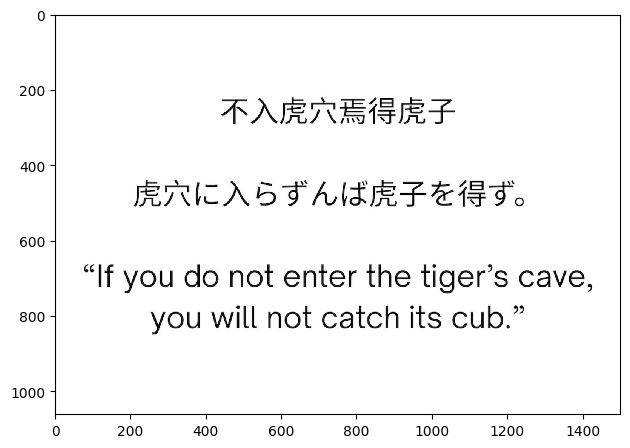

In [205]:
img = io.imread('data/img_multi.jpg')
io.imshow(img)
ocr_text = pytesseract.image_to_string(img, lang='chi_tra+jpn',config="") #the extracted text is stored in ocr_text
print("\nHere is the result:\n")
print(ocr_text)

/tmp/ipython-input-416724373.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)


Behind every ‚ÄúEverything you

great scholar can imagine is
is a substantial real.‚Äù ‚Äî Pablo
amount of :

Picasso

coffee.



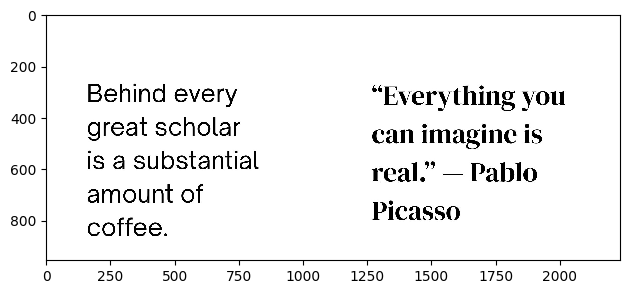

In [206]:
# Use --psm 3 as suggested by the tesseract website
img = io.imread('data/img_blocks.jpg')
io.imshow(img)
ocr_text = pytesseract.image_to_string(img, lang='eng',config="--psm 3") #the extracted text is stored in ocr_text
print(ocr_text)

/tmp/ipython-input-3676774334.py:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(resized_image)


Behind every
great scholar
is a substantial
amount of
coffee.

‚ÄúEverything you
can imagine is
real.‚Äù ‚Äî Pablo
Picasso



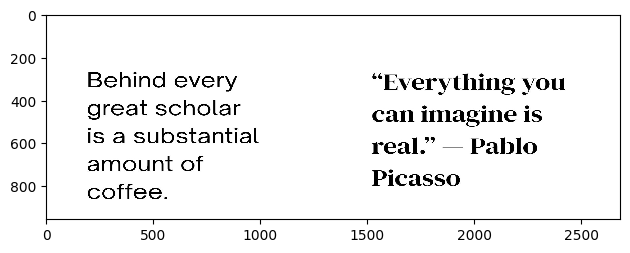

In [207]:
# The gap might be relatively small for the machine to recognise as separation between colunms
# lets try resize the image to wider the gap
height, width, colour = img.shape
new_height = int(height*1)
new_width = int(width*1.2)
resized_image = cv2.resize(img, (new_width, new_height))
io.imshow(resized_image)
ocr_text = pytesseract.image_to_string(resized_image, lang='eng',config="--psm 3") #the extracted text is stored in ocr_text
print(ocr_text)

## Colour correction

Note that the UoE logo has a lighter colour which fails to be detected as characters. Another common way to improve ORC quality is coulour correction.

Note
### Colour convertion
- COLOR_RGB2BGR remove alpha (transparent) chanell from image
- COLOR_BGR2GRAY conver image to grey scale
- Open cv [Colour conversion code](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html)


### Thresholding
- Open cv [Threshholding](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)



/tmp/ipython-input-4029869264.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)


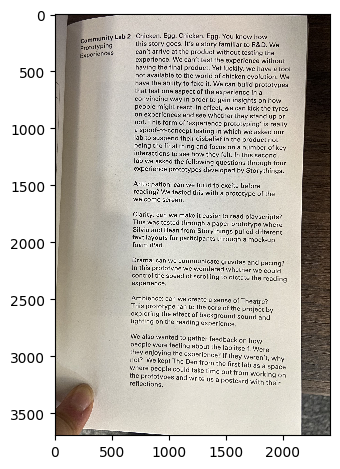

In [208]:
# Use psm 3 as suggested by the official website
img = io.imread('data/img_shadow.jpg')
io.imshow(img)

/tmp/ipython-input-1586691712.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(gray_img)


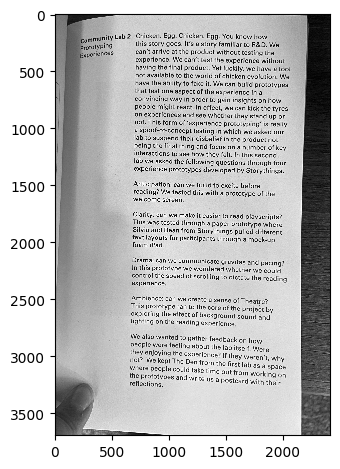

In [209]:
img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
io.imshow(gray_img)


### Simple Thresholding method

- The first argument is the source image, which should be a  grayscale image.
- The second argument is the threshold value which is used to classify the pixel values.
- The third argument is the maximum value which is assigned to pixel values exceeding the threshold.
Note that we passed a combination of THRESH_BINARY + THRESH_OTSU
THRESH_BINARY  turn the image in to either 0 (black) or 255(white)
THRESH_OTSU The threshold value can be chosen arbitrary. The algorithm then finds the optimal threshold value which is returned as the first output.
- The method returns two outputs. The first is the threshold that was used and the second output is the thresholded image.

/tmp/ipython-input-4206457854.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(thresh) #show pre-processed image


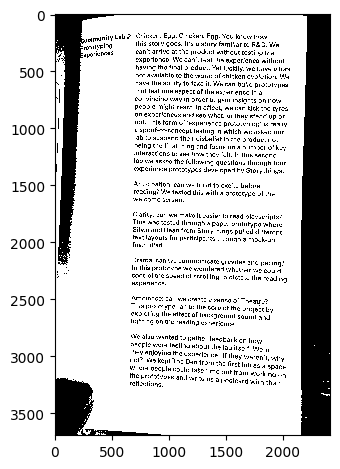

In [210]:
# the first output is the threshold value and the second is the thresholded image array
ret, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
io.imshow(thresh) #show pre-processed image

### Adaptive thresholding

- The 1st argument is the source image, which should be a  grayscale image.
- The 2nd argument is the threshold value which is used to classify the pixel values.
- The 3rd argument is the adaptive thresholding method (here we use mean value method)
- The 4th arguement is the threshold method (here we use binary method, same to simple thresholding)
- The 5th our pixel neighborhood size, it must be an odd number
- The 6th arguement let you tune the thresholding result. (more infromation on how to choose this constant [here](https://pyimagesearch.com/2021/05/12/adaptive-thresholding-with-opencv-cv2-adaptivethreshold/))

In [ ]:
#¬†Try different combination of arguement 5 and 6 and compare it with the reference results

thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, ? ,?)
io.imshow(thresh)


SyntaxError: invalid syntax (ipython-input-3980896508.py, line 3)

In [211]:
# Reference result
img = io.imread('data/results/thresh_result1.jpg')
io.imshow(img)

FileNotFoundError: No such file: '/content/data/thresh_result1.jpg'

In [ ]:
ocr_text = pytesseract.image_to_string(thresh, lang='eng',config="--psm 3") #the extracted text is stored in ocr_text
print(ocr_text)



[‚Äî

: b2 Chicken. Egg. Chicken. Egg. You know how
this story goes. It‚Äôs a story familiar to R&D. We
can‚Äôt arrive at the product without testing the
experience. We can‚Äôt test the experience without
having the final product. Yet luckily, we have a tool
not available to the world of chicken evolution. We
have the ability to fake it. We can build prototypes
that test one aspect of the experience in a
convincing way in order to gain insights on how
people might react. In effect, we can kick the tyres
on experiences and see whether they stand up or

~ not. This form of ‚Äòexperience prototyping‚Äô is really
a spoof-of-concept testing in which we asked our
lab to suspend their disbelief in the product not
being the final thing and focus on a number of key

_ interactions to see how they felt. In this second.
lab we asked the following questions through four

~ experience prototypes developed by Storythings.

community La
prototyping
Experiences

Anticipation: can we build to excite be

# Key take away from this section

Imgage pre-processing in ocr can improve the accuracy significantly. However, there is no universal solution or recipe to pre-process your data. It is important to observe your data and find the patterns and sources of errors that can be pre-processed.

Reference parameter setting:


- multiple language: --psm 4 (text with different sizes)
- adaptive thresholding: pixcel size 25, constant c 20, psm 3

# Example 1: Japanese verticle text from old news paper



> Please follow the following workflow to complete the task



### 01 - Colour correction with thresholding technique
Thresholding is the binarization of an image. We want to:
1. convert a coloured image to grayscale image


2. convert the grayscale image to a binary image, where the pixels are either 0 or 255

This can be easily done with image processing library such as Opencv



In [212]:
# import image processing and manipulation libraries
import cv2
from PIL import Image
import numpy as np

/tmp/ipython-input-3854191748.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)


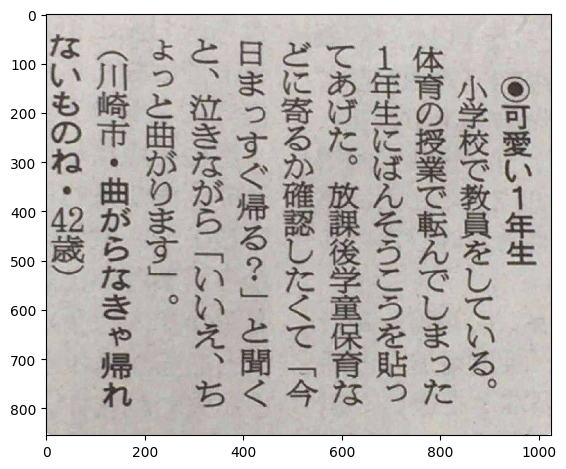

In [214]:
# load and show image
img = io.imread('data/img_jpn_verticle.jpg')
io.imshow(img)

/tmp/ipython-input-1292035330.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(gray_img)


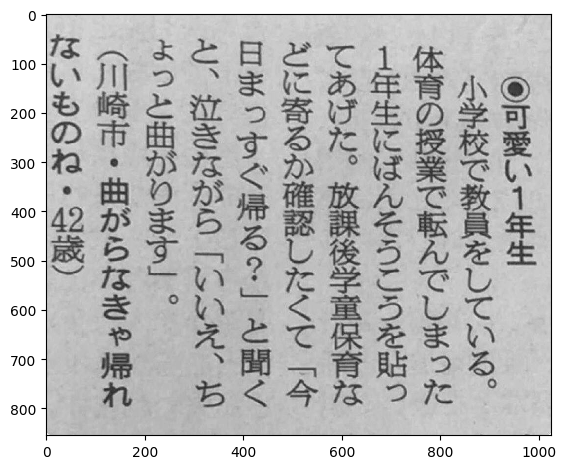

In [ ]:
# Cover image to grayscale using the same method mentioned above
img = cv2.cvtColor(np.array(img), cv2.???)
gray_img = cv2.cvtColor(img, cv2.???)
io.imshow(gray_img)


/tmp/ipython-input-1532166818.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(thresh) #show pre-processed image


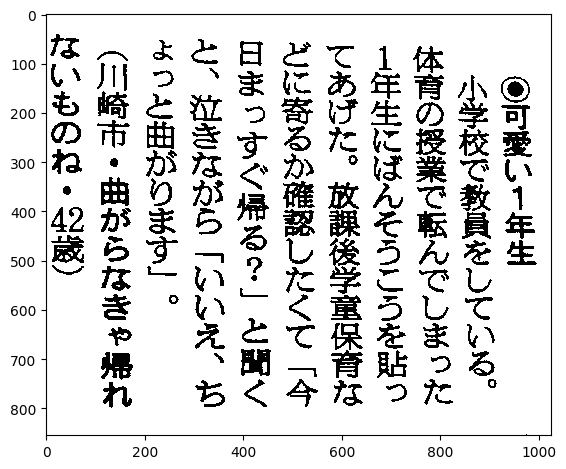

In [ ]:
# Perform simple thresholding
ret, thresh = cv2.threshold(gray_img, 0, 255, ????)
io.imshow(thresh) #show pre-processed image

In [ ]:
# Reference result
img = io.imread('data/results/thresh_result2.jpg')
io.imshow(img)


### 02 - Recognise verticle text
For languages that use verticle writing system, there are language packages trained to tackle these variations.

You can visit Tesseract documentation [page](https://tesseract-ocr.github.io/tessdoc/Data-Files-in-different-versions.html) to check language package information and find the language package for recognising vertical japanese text.

Also, you can play with different segmentation option and compare the results:


In [ ]:
ocr_text = pytesseract.image_to_string(thresh, lang='', config="")
#the extracted text is stored in ocr_text
print("\nHere is the result:\n")
print(ocr_text)



Here is the result:

ÂèØÊÑõ „ÅÑ 1 Âπ¥ Áîü

Â∞èÂ≠¶ Ê†° „Åß ÊïôÂì° „Çí „Åó „Å¶ „ÅÑ„Çã „ÄÇ
‰ΩìËÇ≤ „ÅÆ ÊéàÊ•≠ „Åß Ëª¢„Çì „Åß „Åó „Åæ„Å£ „Åü
1 Âπ¥ Áîü „Å´ „Å∞ „Çì „Åù„ÅÜ „Åì„ÅÜ „Çí Ââá„Å£
„Å¶ „ÅÇ„Åí „Åü „ÄÇ Êîæ Ë™≤ Âæå Â≠¶Á´• ‰øùËÇ≤
„Å© „Å´ ÂØÑ„Çã „Åã Á¢∫Ë™ç „Åó „Åü „Åè „Å¶ [ ‰ªä
Êó• „Åæ„Å£ „Åô„Åê Â∏∞„Çã ?„Äç „Å® ËÅû„Åè <
„Å® „ÄÅ Ê≥£ „Åç „Å™ „Åå „Çâ „Äå „ÅÑ „Å™ V „Åà „ÄÅ „Å°
„Çá „Å£ „Å® Êõ≤„Åå„Çä „Åæ„Åô „Äç„ÄÇ
(Â∑ùÂ¥é Â∏Ç „Éª Êõ≤ „Åå „Çâ „Å™ „Åç„ÇÉ Â∏∞„Çå
„Å™ „ÅÑ„ÇÇ „ÅÆ „Å≠ „Éª ÂÖ¨ Ê≠≥ )



Reference results

```
ÂèØÊÑõ „ÅÑ 1 Âπ¥ Áîü

Â∞èÂ≠¶ Ê†° „Åß ÊïôÂì° „Çí „Åó „Å¶ „ÅÑ„Çã „ÄÇ
‰ΩìËÇ≤ „ÅÆ ÊéàÊ•≠ „Åß Ëª¢„Çì „Åß „Åó „Åæ„Å£ „Åü
1 Âπ¥ Áîü „Å´ „Å∞ „Çì „Åù„ÅÜ „Åì„ÅÜ „Çí Ââá„Å£
„Å¶ „ÅÇ„Åí „Åü „ÄÇ Êîæ Ë™≤ Âæå Â≠¶Á´• ‰øùËÇ≤
„Å© „Å´ ÂØÑ„Çã „Åã Á¢∫Ë™ç „Åó „Åü „Åè „Å¶ [ ‰ªä
Êó• „Åæ„Å£ „Åô„Åê Â∏∞„Çã ?„Äç „Å® ËÅû„Åè <
„Å® „ÄÅ Ê≥£ „Åç „Å™ „Åå „Çâ „Äå „ÅÑ „Å™ V „Åà „ÄÅ „Å°
„Çá „Å£ „Å® Êõ≤„Åå„Çä „Åæ„Åô „Äç„ÄÇ
(Â∑ùÂ¥é Â∏Ç „Éª Êõ≤ „Åå „Çâ „Å™ „Åç„ÇÉ Â∏∞„Çå
„Å™ „ÅÑ„ÇÇ „ÅÆ „Å≠ „Éª ÂÖ¨ Ê≠≥ )
```



# Example 2: Meme with different colour background

> Please follow the following workflow to complete the task


### 01 - Colour selection with masking technique
This example demonstrates a different colour convertion technique by creating a colour filter to make the range of colour of the text we want to extract from the image.



/tmp/ipython-input-2139132787.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)


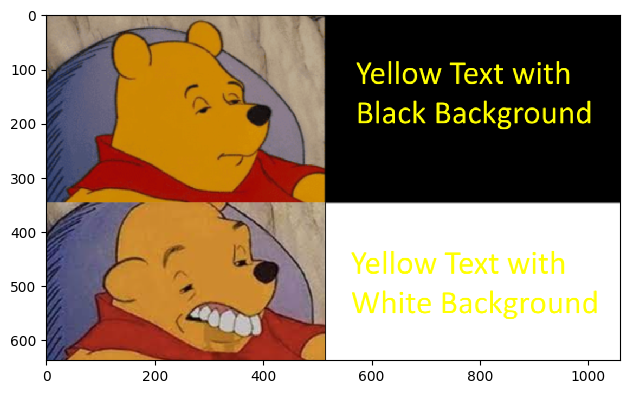

In [216]:
img = io.imread('data/img3.jpg')
io.imshow(img)


In [ ]:
text = pytesseract.image_to_string(img, lang='eng')
print(text)

Yellow Text with
Black Background

 



The result shows that only the text "Yellow Text with Black Background" was extracted. Let's try increase the contrast of the colours with opencv.

Yellow Text with
Black Background

 



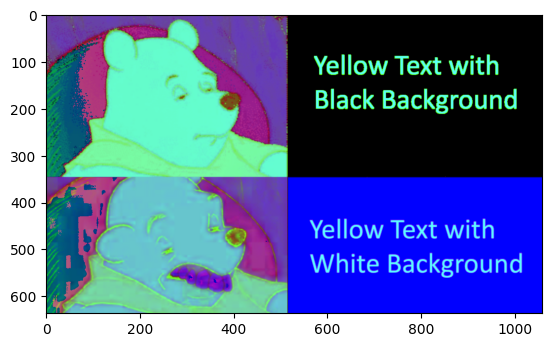

In [ ]:
import numpy as np
HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(HSV)
data = pytesseract.image_to_string(HSV, lang='eng')
print(data)

Yellow Text with
Black Background

N(el Ke) Vane awe
White Background



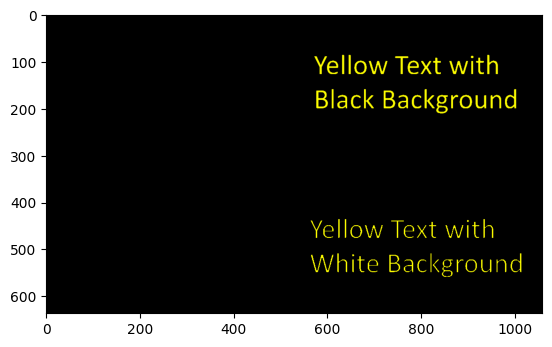

In [ ]:
mask = cv2.inRange(HSV, (50, 255, 160), (200, 255, 255)) #Define the colour range
imask = mask > 0 #Select the pixels where the colour is in the range
result = np.zeros_like(img, np.uint8) #Create an empty image the same size to the file
result[imask] = img[imask] #Copy the part of image in the colour range to the resulting image
plt.imshow(result)
data = pytesseract.image_to_string(result, lang='eng')
print(data)

In [ ]:
#Try a different model to compare result:
ocr_text = pytesseract.image_to_string(result, lang='eng', config = '--psm 11')
print(ocr_text)

Yellow Text with

Black Background

Yellow Text with

White Background



## 02 Visualise the ocr result

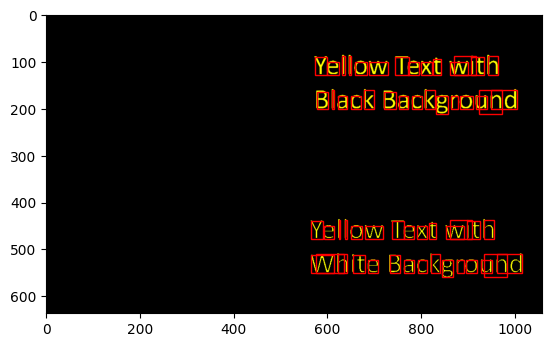

In [ ]:
# Some packages allows you to visualise the results:

img = result
hImg, wImg, _ = img.shape
boxes = pytesseract.image_to_boxes(result,lang='eng', config = '--psm 11')
#print(boxes)
for b in boxes.splitlines():
  b = b.split(' ')
  x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
  rect = patches.Rectangle((x, hImg-y-(h-y)), w-x, h-y, linewidth=1, edgecolor='r', facecolor='none')
  ax = plt.gca()
  ax.add_patch(rect)

plt.imshow(img)


Challenge yourself by extracting text from "data/img4.jpg"

/tmp/ipython-input-582595895.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)


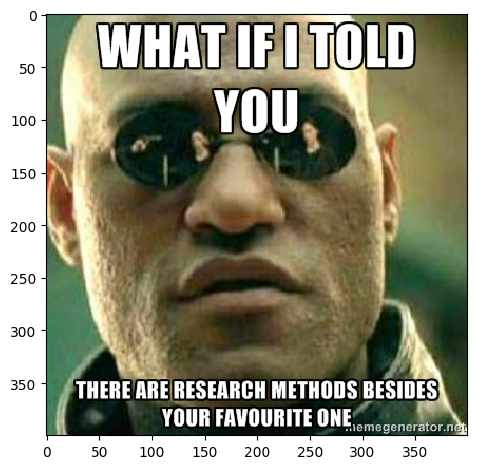

In [217]:
img = io.imread('data/img4.jpg')
io.imshow(img)


# Example 3: Skewed image

Use the deskew library to correct the orientation and skewed texts. Please refere to the official document of deskew package: [here](https://pypi.org/project/deskew/)

This library perform well on slightly skewed but clear scaned images.
For people who are interested in tacking highly skewed images, please search for technique related to geometric distortion.




In [ ]:
import math
from typing import Tuple, Union
import cv2
import numpy as np

from deskew import determine_skew


def rotate(
        image: np.ndarray, angle: float, background: Union[int, Tuple[int, int, int]]
) -> np.ndarray:
    old_width, old_height = image.shape[:2]
    angle_radian = math.radians(angle)
    width = abs(np.sin(angle_radian) * old_height) + abs(np.cos(angle_radian) * old_width)
    height = abs(np.sin(angle_radian) * old_width) + abs(np.cos(angle_radian) * old_height)

    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    rot_mat[1, 2] += (width - old_width) / 2
    rot_mat[0, 2] += (height - old_height) / 2
    return cv2.warpAffine(image, rot_mat, (int(round(height)), int(round(width))), borderValue=background)



show original imgage


/tmp/ipython-input-1599906738.py:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(thresh)


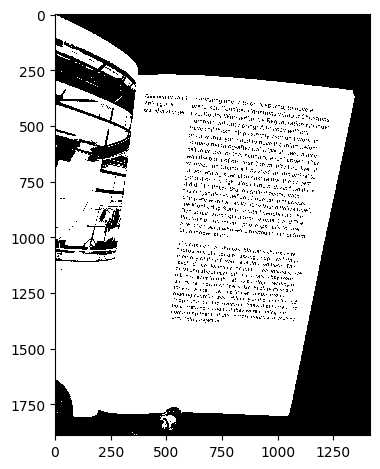

In [218]:
image = cv2.imread('data/img_skew.jpg')
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

print("show original imgage")
io.imshow(thresh)

Correction angle: 5.999999999999996


/tmp/ipython-input-1847442709.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(rotated)


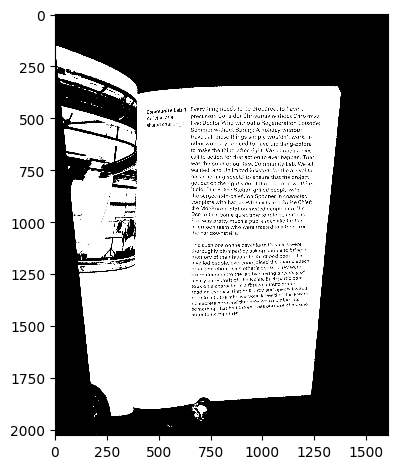

In [219]:
angle = determine_skew(thresh) #Determine correction angle
print("Correction angle:", angle)
rotated = rotate(thresh, angle, (0, 0, 0))
io.imshow(rotated)

## Advanced application of Open CV and tesseract with line detection

- [Edge and line detection](https://pyimagesearch.com/2015/04/06/zero-parameter-automatic-canny-edge-detection-with-python-and-opencv/)
- [How to detect table](https://livefiredev.com/how-to-extract-table-from-image-in-python-opencv-ocr/)

# üü¢ **Handwritten Text Recognition**

**H**andrwitten **T**ext **R**ecognition (HTR) is another method of text extraction, although it is in the earlier stages of development than OCR is.
Unlike OCR, which is best used on printed text, HTR engines are designed to be run on handwritten text and often use machine learning models to intelligently recognise text.


## ‚úèÔ∏è *Activity 5*  

[Transkribus](https://readcoop.eu/transkribus/) is one of the leading options in HTR; although designed for handwritten text, it can also be used on printed text.

*   Try uploading an image (PNG or JPG) of handwritten and/or printed text to their website https://readcoop.eu/transkribus/

*   How does changing the language used impact your results?


**Disclaimer*: Transkribus operates on a paid credit model, but the test option outlined above is free. Sign up is free and includes a small number of credits when [joining](https://readcoop.eu/transkribus/credits/).





---



# **Resources List**

**Tutorials**

Centre for Data, Culture and Society. "Text Extraction & Preparation," Managing Digitised Documents (2022), https://www.cdcs.ed.ac.uk/training/training-pathways/managing-digitised-documents-pathway [accessed 23 July 2023].

Knox, Doug. "Understanding Regular Expressions," Programming Historian 2 (2013), https://doi.org/10.46430/phen0033 [accessed 23 July 2023].

Turner O'Hara, Laura. "Cleaning OCR‚Äôd text with Regular Expressions," Programming Historian 2 (2013), https://doi.org/10.46430/phen0024 [accessed 23 July 2023].

Library Carpentry. "Introduction to Working with Data (Regular Expressions)" (2023), https://librarycarpentry.org/lc-data-intro/01-regular-expressions.html [accessed 23 July 2023].

"Regular Expressions Cheat Sheet" by Davidchild, https://cheatography.com/davechild/cheat-sheets/regular-expressions/ [accessed 10 Sep 2025]

**Readings**

Cordell, Ryan. ‚Äò‚ÄúQ i-Jtb the Raven‚Äù: Taking Dirty OCR Seriously‚Äô. Book History 20, no. 1 (2017): 188‚Äì225. https://doi.org/10.1353/bh.2017.0006 [accessed 23 July 2023].

Schantz, Herbert F. The History of OCR, Optical Character Recognition. [Manchester Center, Vt.]‚ÄØ: Recognition Technologies Users Association, (1982) http://archive.org/details/historyofocropti0000scha [accessed 23 July 2023].


# **Activity Notes**


## ‚úèÔ∏è Activity 1
Even if you have not heard of OCR or are not sure if you have used it, you probably have! Here are some real-world examples of text recognition uses:

*   Using the airport‚Äôs e-Passport Gates
*   Translating text with language recognition
*   Searching a digital database of historical public records
*   Searching a PDF file

## ‚úèÔ∏è Activity 2
If you are not sure what to choose as your dataset, imagine you are digitising a book; think of your favourite book or try browsing the following website to find examples you could use:

*   https://openbooks.is.ed.ac.uk/

Don't forget that the type of materials you choose will impact your OCR, and different material types might need slightly different considerations for selecting OCR software or anticipating problems.



## ‚úèÔ∏è Activity 3
This list is not exhaustive but will cover some of the potential issues you might have picked out:

Document 1:

*   There are marks on the top left of the page that might be picked up by accident
*   The text uses the long 's' form that may be mistaken for an 'f'
*   You can see text coming through from other pages, depending on the OCR engine, this could be picked up
*   Sometimes spacing between letters can cause issues, and the individual letters will be picked up rather than the entire word, for example with 'PETITION'

Overall the image is clear, there is a good light balance and the text is quite straight on the page.

Document 2:

*   There are lots of marks and darlk spots on the page that may be picked up by the text recognition
*   There are lots of creases in the page, meaning that some of the lettering is a little warped and may not be picked up correctly
*   There is some text coming through from the other side of the page, although this is not as dark as in the previous example
*   Some of the writing is very small and appears to be smudged in printing, which may mean that letters are misrecognised

Overall, the text looks clear in some places, however the physical condition of the item is likely to impact the OCR done on this item due to the creases and marks on the page.

## ‚úèÔ∏è Activity 4
Any text extraction software or programme you decide to use will need to be evaluated - was it effective for the materials, or if not, why not? The limitations of OCR outputs are important to consider too - if you are only looking at a small quantity of text then you may be able to manually correct as much as you need to. If you are working with larger quantities of text this may not be the case and you will need to choose the best-performing option and do additional clean up with programming, or establish a suitable level of acceptable errors.

## ‚úèÔ∏è Activity 5
As shown in this example, image pre-processing can help improve the performace of OCR text extraction. However, when dealing with a large database, the type of the errors or "noise" in the data can vary and therefore requires a combination of techniques to extract the text successfully.


## ‚úèÔ∏è Activity 6
Transkribus has models designed for handwriting and print because they are trained on either handwritten text or printed text, to produce the vest results possible for the different types of materials. The same goes for different languages and some of the models distinguish between different fonts or handwriting types. If you play around with the model types and images you use, you should see a difference in output quality.






